In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


### Importing librarise

We will be importing the functions and methods of the following libraries

- Pandas
- Numpy
- Seaborn
- SkLearn
- Lightgbm
- scipy


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from scipy.stats import chi2_contingency

from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier



#### Configuration of the pandas library


The `pd.set_option('display.max_columns', None)` function in Pandas adjusts the display settings to show all columns in a DataFrame. Setting the value to `None` removes the limit on visible columns, so no columns are hidden or cut off when displaying large DataFrames.  


In [3]:
pd.set_option('display.max_columns', None)

- We have the kaggle data in the system threat forecaster folder and the folder path is `/kaggle/input/System-Threat-Forecaster/`. so we will be firstly import the data with read_csv function of the Pandas library with train_set and test as names.
- Also we are making a copy of the `train_set` as `train` and we will do operations on the `train`.

In [4]:

train_set = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
train =train_set 
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

- `head()` To List first 5 rows of the data
- `info()` To get data types and number of values column wise info
- `shape` To get shape of the data set
- `nunique` To count of unique valuesin the dataset
- `train.duplicated().value_counts()` To get total number of duplicated values
- `columns` To get name of the columns

In [5]:
train.head()

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0                            1.0   
1                     0            53447.0                            1.0   
2                     0            53447.0                            1.0   
3                     0            46413.0                            2.0   
4                     0            40466.0                            2.0   

   NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                          1.0       1         51  120232.0         98.0   
1                          1.0       1        141  112854.0        167.0   
2                          1.0       1         51   41759.0         98.0   
3                          1.0       1         68   19507.0        276.0   
4                          1.0       1         43  117801.0         53.0   

   LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                  103    windows10       x86  10.0.0.0          14393   
1                  227    windows10       x64  10.0.0.0          17134   
2                  103    windows10       x64  10.0.0.0          17134   
3                   74    windows10       x64  10.0.0.0          15063   
4                   42    windows10       x86  10.0.0.0          17134   

   OSProductSuite OsPlatformSubRelease  \
0             768                  rs1   
1             256                  rs4   
2             768                  rs4   
3             768                  rs2   
4             256                  rs4   

                                    OSBuildLab SKUEditionName  \
0  14393.2214.x86fre.rs1_release_1.180402-1758           Home   
1     17134.1.amd64fre.rs4_release.180410-1804            Pro   
2     17134.1.amd64fre.rs4_release.180410-1804           Home   
3     15063.0.amd64fre.rs2_release.170317-1834           Home   
4       17134.1.x86fre.rs4_release.180410-1804            Pro   

   IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
0                1.0                            0    0.0         98.0   
1                1.0                            0    0.0        137.0   
2                1.0                            0    0.0        137.0   
3                1.0                            0    0.0        108.0   
4                1.0                            0    0.0        137.0   

   FirewallEnabled  EnableLUA MDC2FormFactor     DeviceFamily  OEMNameID  \
0              1.0        1.0    SmallTablet  Windows.Desktop      561.0   
1              1.0        1.0       AllInOne  Windows.Desktop     2668.0   
2              1.0        1.0        Desktop  Windows.Desktop     3035.0   
3              1.0        1.0       Notebook  Windows.Desktop     2102.0   
4              1.0        1.0        Desktop  Windows.Desktop     2668.0   

   OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  ProcessorModelID  \
0    330367.0                 4.0                      5.0            1850.0   
1     25212.0                 4.0                      5.0            2407.0   
2    263666.0  

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [7]:
train.shape

(100000, 76)

In [8]:
test.shape

(10000, 75)

In [9]:
df = pd.DataFrame(train.nunique())
df.T

MachineID  ProductName  EngineVersion  AppVersion  SignatureVersion  \
0      99835            2             37          69              2735   

   IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
0           1                        6                     2   

   AntivirusConfigID  NumAntivirusProductsInstalled  \
0               1976                              5   

   NumAntivirusProductsEnabled  HasTpm  CountryID  CityID  GeoRegionID  \
0                            5       2        220   16047          239   

   LocaleEnglishNameID  PlatformType  Processor  OSVersion  OSBuildNumber  \
0                  185             4          3          7             24   

   OSProductSuite  OsPlatformSubRelease  OSBuildLab  SKUEditionName  \
0               7                     9         281               8   

   IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
0                  2                            1      2          102   

   FirewallEnabled  EnableLUA  MDC2FormFactor  DeviceFamily  OEMNameID  \
0                2          3              11             2        837   

   OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  ProcessorModelID  \
0       15952                  19                        4              1659   

   PrimaryDiskCapacityMB  PrimaryDiskType  SystemVolumeCapacityMB  \
0                    398                4                   46188   

   HasOpticalDiskDrive  TotalPhysicalRAMMB  ChassisType  \
0                    2                 127           28   

   PrimaryDisplayDiagonalInches  PrimaryDisplayResolutionHorizontal  \
0                           362                                 121   

   PrimaryDisplayResolutionVertical  PowerPlatformRole  \
0                               131                  9   

   InternalBatteryNumberOfCharges  NumericOSVersion  OSArchitecture  OSBranch  \
0                            1760               221               3        13   

   OSBuildNumberOnly  OSBuildRevisionOnly  OSEdition  OSSkuFriendlyName  \
0                 23                  199         20                 18   

   OSInstallType  OSInstallLanguageID  OSUILocaleID  AutoUpdateOptionsName  \
0              9                   39            64                      6   

   IsPortableOS  OSGenuineState  LicenseActivationChannel  IsFlightsDisabled  \
0             2               4                         6                  1   

   FlightRing  FirmwareManufacturerID  FirmwareVersionID  IsSecureBootEnabled  \
0           7                     169              12299                    2   

   IsVirtualDevice  IsTouchEnabled  IsPenCapable  \
0                2               2             2   

   IsAlwaysOnAlwaysConnectedCapable  IsGamer  RegionIdentifier  DateAS  \
0                                 2        2                15    2695   

   DateOS  target  
0     112       2

In [10]:
train.duplicated().value_counts()

False    99835
True       165
Name: count, dtype: int64

In [11]:
train.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

### Checking of null values



1. In our data set we have 47 + 1 numerical and target column respectively. And 28 the number of categorical columns. Hence total 76 Columns
2. We have created a dataframe as  Data Descriptor to properly formally describe about the trining data and its null values, percentage null values and data type.
3. To get the null values we use the `isnull()` method of the numpy library

In [12]:

data_descriptor = pd.DataFrame({
    "Null Count": train.isnull().sum(), #---> getting the count ofnull values
    "Total": train.shape[0],#---> Total number of data cells
    "Null %": round(train.isnull().mean() * 100, 2),# ---> percentage and rounded to 2 decimals
    "Type": train.dtypes# --> type of the data frame
}).transpose()

data_descriptor


MachineID ProductName EngineVersion AppVersion SignatureVersion  \
Null Count         0           0             0          0                0   
Total         100000      100000        100000     100000           100000   
Null %           0.0         0.0           0.0        0.0              0.0   
Type          object      object        object     object           object   

           IsBetaUser RealTimeProtectionState IsPassiveModeEnabled  \
Null Count          0                      66                    0   
Total          100000                  100000               100000   
Null %            0.0                    0.07                  0.0   
Type            int64                 float64                int64   

           AntivirusConfigID NumAntivirusProductsInstalled  \
Null Count                76                            76   
Total                 100000                        100000   
Null %                  0.08                          0.08   
Type                 float64                       float64   

           NumAntivirusProductsEnabled  HasTpm CountryID   CityID GeoRegionID  \
Null Count                          76       0         0      623           0   
Total                           100000  100000    100000   100000      100000   
Null %                            0.08     0.0       0.0     0.62         0.0   
Type                           float64   int64     int64  float64     float64   

           LocaleEnglishNameID PlatformType Processor OSVersion OSBuildNumber  \
Null Count                   0            0         0         0             0   
Total                   100000       100000    100000    100000        100000   
Null %                     0.0          0.0       0.0       0.0           0.0   
Type                     int64       object    object    object         int64   

           OSProductSuite OsPlatformSubRelease OSBuildLab SKUEditionName  \
Null Count              0                    0          0              0   
Total              100000               100000     100000         100000   
Null %                0.0                  0.0        0.0            0.0   
Type                int64               object     object         object   

           IsSystemProtected AutoSampleSubmissionEnabled    SMode IEVersionID  \
Null Count                76                           0      981         107   
Total                 100000                      100000   100000      100000   
Null %                  0.08                         0.0     0.98        0.11   
Type                 float64                       int64  float64     float64   

           FirewallEnabled EnableLUA MDC2FormFactor DeviceFamily OEMNameID  \
Null Count             166        19              0            0       212   
Total               100000    100000         100000       100000    100000   
Null %                0.17      0.02            0.0          0.0      0.21   
Type               float64   float64         object       object   float64   

           OEMModelID ProcessorCoreCount ProcessorManufacturerID  \
Null Count        228                 85                      85   
Total          100000             100000                  100000   
Null %           0.23               0.08                    0.08   
Type          float64            float64                 float64   

           ProcessorModelID PrimaryDiskCapacityMB PrimaryDiskType  \
Null Count               85                   110              23   
Total                100000                100000          100000   
Null %                 0.08                  0.11            0.02   
Type                float64               float64          object   

           SystemVolumeCapacityMB HasOpticalDiskDrive TotalPhysicalRAMMB  \
Null Count                    110                   0                151   
Total                      100000              100000             100000   
Null %                       0.11                 0.0

### Identification of Numerical and Categorical Columns

Here we are using the `select_dtypes` method to properly select the columns and we are getting input in list. We have printed the number os categorical and numerical columns and name of the columns.

In [13]:


numericalColumns = train.select_dtypes(exclude=["object"]).columns.tolist()
categoricalColumns = train.select_dtypes(include=["object"]).columns.tolist()



print(f"The number of numerical columns: {len(numericalColumns)}")
print(f"The number of categorical columns: {len(categoricalColumns)}")



# we are doing this operation to print the numerical and categorical columns as a dataframe

numericalColumnsForDf=numericalColumns.copy()
categoricalColumnsForDf=categoricalColumns.copy()

maxlen = max(len(numericalColumns),len(categoricalColumns))
numericalColumnsForDf+= ['-']*(maxlen - len (numericalColumns))
categoricalColumnsForDf+= ['-']*(maxlen - len (categoricalColumns))

columnsNumCat = pd.DataFrame ({
    'Numerical Columns':numericalColumnsForDf,
    'Categorical Columns':categoricalColumnsForDf,
})
columnsNumCat.T



The number of numerical columns: 48
The number of categorical columns: 28


0                        1   \
Numerical Columns    IsBetaUser  RealTimeProtectionState   
Categorical Columns   MachineID              ProductName   

                                       2                  3   \
Numerical Columns    IsPassiveModeEnabled  AntivirusConfigID   
Categorical Columns         EngineVersion         AppVersion   

                                                4   \
Numerical Columns    NumAntivirusProductsInstalled   
Categorical Columns               SignatureVersion   

                                              5          6          7   \
Numerical Columns    NumAntivirusProductsEnabled     HasTpm  CountryID   
Categorical Columns                 PlatformType  Processor  OSVersion   

                                       8            9                    10  \
Numerical Columns                  CityID  GeoRegionID  LocaleEnglishNameID   
Categorical Columns  OsPlatformSubRelease   OSBuildLab       SKUEditionName   

                                 11              12                 13  \
Numerical Columns     OSBuildNumber  OSProductSuite  IsSystemProtected   
Categorical Columns  MDC2FormFactor    DeviceFamily    PrimaryDiskType   

                                              14                 15  \
Numerical Columns    AutoSampleSubmissionEnabled              SMode   
Categorical Columns                  ChassisType  PowerPlatformRole   

                                   16               17         18         19  \
Numerical Columns         IEVersionID  FirewallEnabled  EnableLUA  OEMNameID   
Categorical Columns  NumericOSVersion   OSArchitecture   OSBranch  OSEdition   

                                    20                  21  \
Numerical Columns           OEMModelID  ProcessorCoreCount   
Categorical Columns  OSSkuFriendlyName       OSInstallType   

                                          22                23  \
Numerical Columns    ProcessorManufacturerID  ProcessorModelID   
Categorical Columns    AutoUpdateOptionsName    OSGenuineState   

                                           24                      25  \
Numerical Columns       PrimaryDiskCapacityMB  SystemVolumeCapacityMB   
Categorical Columns  LicenseActivationChannel              FlightRing   

                                      26                  27  \
Numerical Columns    HasOpticalDiskDrive  TotalPhysicalRAMMB   
Categorical Columns               DateAS              DateOS   

                                               28  \
Numerical Columns    PrimaryDisplayDiagonalInches   
Categorical Columns                             -   

                                                     29  \
Numerical Columns    PrimaryDisplayResolutionHorizontal   
Categorical Columns                                   -   

                                                   30  \
Numerical Columns    PrimaryDisplayResolutionVertical   
Categorical Columns                                 -   

                                                 31                 32  \
Numerical Columns    InternalBatteryNumberOfCharges  OSBuildNumberOnly   
Categorical Columns                               -                  -   

                                      33                   34            35  \
Numerical Columns    OSBuildRevisionOnly  OSInstallLanguageID  OSUILocaleID   
Categorical Columns                    -                    -             -   

                               36                 37                      38  \
Numerical Columns    IsPortableOS  IsFlightsDisabled  FirmwareManufacturerID   
Categorical Columns             -                  -                       -   

                                    39                   40               41  \
Numerical Columns    FirmwareVersionID  IsSecureBootEnabled  IsVirtualDevice   
Categorical Columns                  -                    -                -   

                                 42            43  \
Numerical Columns    IsTouchEnabled  IsPenCapabl

In [14]:
numericalColumns.remove('target')#----> we are removing the target column from the list 
# so that the scalling operation will not get performed on target column

#### Numerical Feature Analysis

This table shows some vital information about the numerical features of a dataset

#### Key Terms:
- Count: Number of rows with a valid value for the columns.
- Mean: The average value of that columns.
- Std (Standard Deviation): Standard Deviation tell us how spread out the values are in the column. A higher number means more variation.
- Min: The smallest value in the column.
- 25%, 50%, 75% (Quartiles): These divide the data into four parts: where 25 represents quater value , 50 represents median and lastly 75 retpresents the threequater value of all the numerical data points
- Max: The largest value in the column.


#### IsBetaUser:
- All values are `0`, means no users in the dataset are beta users. Beta users are software tester users. The software companies firstly develops the software then they release for software testing team of the company and after the approval they release it for public beta users. This beta users checks the software and give feedback to company and after this the company make the stable release of the software

#### RealTimeProtectionState:
- Mean is around `6.85`, and most values are between `7` and `8`. I think this shows the state of real-time protection (like antivirus settings) and it shows the level of the protection state between 0 to 8 and majority people have turned the protection state ON.

#### NumAntivirusProductsInstalled:
- Mean is around `1.33`, with most people having 1 or 2 antivirus products installed. A few users have up to 5 products, which might be unusual but a good thing.

#### HasTpm (Trusted Platform Module):
- Mean is `0.996`, with 0 or 1 as possible values. Hence, in this column almost everyone has TPM enabled (which is important for security).

#### CountryID:
- This is a numerical ID for countries. The values range from `1` to `222`.
- The distribution tells us which user is from which country, but we need a mapping to know which ID belongs to which country for understanding the data set.

#### ProcessorCoreCount:
- Mean is around `4`, with most people having 2 or 4 cores. This are the normal users like house hold computers, normal educational institute, etc.
- A few outliers have as many as 64 cores This are probably high performance machines that may be used as servers, high level gaming tasks, etc.

#### PrimaryDiskCapacityMB:
- Average disk size is around 515 GB, but it ranges from small drives (~12 GB) to massive ones (up to ~7.6 TB!).
- In this column large standard deviation shows there are a wide variety of disk sizes.

#### PrimaryDisplayResolution:
- Horizontal resolution averages around 1552 pixels, vertical around 898 pixels.
- Most users probably have HD or Full HD screens, but there are outliers with very high resolutions.

#### IsSecureBootEnabled:
- Mean is about `0.5`, so around half of the devices in the column have secure boot enabled, and other half have turned it OF.

#### IsGamer:
- About 30% of users are gamers based on some criteria this feature uses. This can be Highend gamers or may me normal gamers. IsGamer is important beacouse some gamers instead of buying the game download the pirated and cracked games.



In [15]:
# train[numericalColumns].describe().T
#only by using this formula we are getting output in exponential notation like this 5.344700e+04


#---> we are doing below operation to properly understand the output in decimal format up to 7 decimals
#--->
pd.options.display.float_format = '{:.7f}'.format 



train[numericalColumns].describe().T

count               mean  \
IsBetaUser                         100000.0000000          0.0000000   
RealTimeProtectionState             99934.0000000          6.8484300   
IsPassiveModeEnabled               100000.0000000          0.0176200   
AntivirusConfigID                   99924.0000000      47975.7104399   
NumAntivirusProductsInstalled       99924.0000000          1.3265282   
NumAntivirusProductsEnabled         99924.0000000          1.0182639   
HasTpm                             100000.0000000          0.9967800   
CountryID                          100000.0000000        108.0787900   
CityID                              99377.0000000      81029.9385874   
GeoRegionID                        100000.0000000        169.7416300   
LocaleEnglishNameID                100000.0000000        122.6951000   
OSBuildNumber                      100000.0000000      15917.2087200   
OSProductSuite                     100000.0000000        578.4033800   
IsSystemProtected                   99924.0000000          0.9553260   
AutoSampleSubmissionEnabled        100000.0000000          0.0000000   
SMode                               99019.0000000          0.0005050   
IEVersionID                         99893.0000000        124.0538476   
FirewallEnabled                     99834.0000000          0.9800669   
EnableLUA                           99981.0000000          0.9965693   
OEMNameID                           99788.0000000       2209.5732653   
OEMModelID                          99772.0000000     238780.9141543   
ProcessorCoreCount                  99915.0000000          4.0114998   
ProcessorManufacturerID             99915.0000000          4.5307111   
ProcessorModelID                    99915.0000000       2367.6930691   
PrimaryDiskCapacityMB               99890.0000000     515861.8826910   
SystemVolumeCapacityMB              99890.0000000     381990.4654420   
HasOpticalDiskDrive                100000.0000000          0.0814000   
TotalPhysicalRAMMB                  99849.0000000       6132.0874420   
PrimaryDisplayDiagonalInches        99928.0000000         16.7086742   
PrimaryDisplayResolutionHorizontal  99928.0000000       1552.2304159   
PrimaryDisplayResolutionVertical    99928.0000000        898.2531923   
InternalBatteryNumberOfCharges      99485.0000000 1118068977.8715887   
OSBuildNumberOnly                  100000.0000000      15990.5963500   
OSBuildRevisionOnly                100000.0000000        986.5313600   
OSInstallLanguageID                 99887.0000000         14.5192668   
OSUILocaleID                       100000.0000000         60.0308700   
IsPortableOS                       100000.0000000          0.0005200   
IsFlightsDisabled                   99674.0000000          0.0000000   
FirmwareManufacturerID              99624.0000000        401.9876134   
FirmwareVersionID                   99666.0000000      32942.6480445   
IsSecureBootEnabled                100000.0000000          0.4956900   
IsVirtualDevice                     99980.0000000          0.0038408   
IsTouchEnabled                     100000.0000000          0.1284700   
IsPenCapable                       100000.0000000          0.0405800   
IsAlwaysOnAlwaysConnectedCapable    99866.0000000          0.0583983   
IsGamer                             99441.0000000          0.2966684   
RegionIdentifier                    99441.0000000          7.8758661   

                                                  std           min  \
IsBetaUser                                  0.0000000     0.0000000   
RealTimeProtectionState                     1.0151661     0.0000000   
IsPassiveModeEnabled                        0.1315664     0.0000000   
AntivirusConfigID                       13803.3215334    39.0000000   
NumAntivirusProductsInstalled               0.5206814     1.0000000   
NumAntivirusProductsEnabled                 0.1552909     0.0000000   
HasTpm                                      0.0566539     0.0000000   
CountryID          

#### Skewness of the Column

- Here we have made the `analyzeSkewness` function which takes the train and numerical columns list as input.
- And with the `.mean(), median(), mode(), skew()` we are measuring the required values and with the if else statement and lastly we have printed the data frame

In [16]:


def analyzeSkewness(df, numericalColumnsInput):
    skewInfo = {}

    for col in numericalColumnsInput:

        meanValue = df[col].mean()
        mnedianValue = df[col].median()
        modeValue = df[col].mode()[0] if not df[col].mode().empty else None
        skew = df[col].skew()
        


        if skew > 0:
            skewness = 'Right-skewed (Positive)'
        elif skew < 0:
            skewness = 'Left-skewed (Negative)'
        else:
            skewness = 'Symmetrical-skewed'

        skewInfo[col] = {
            'Mean': meanValue,
            'Median': mnedianValue,
            'Mode': modeValue,
            'Skew': skew,
            'Skewness': skewness
        }

    return skewInfo



ColumnSkewness = analyzeSkewness(train, numericalColumns)


ColumnSkewnessdf = pd.DataFrame(ColumnSkewness)


skewCounts = ColumnSkewnessdf.loc['Skewness'].value_counts()


print("Skewness Counts for our dataframe with different skewed types are as follows")
print(skewCounts)

ColumnSkewnessdf.T




Skewness Counts for our dataframe with different skewed types are as follows
Skewness
Right-skewed (Positive)    30
Left-skewed (Negative)     14
Symmetrical-skewed          3
Name: count, dtype: int64


Mean         Median  \
IsBetaUser                                  0.0000000      0.0000000   
RealTimeProtectionState                     6.8484300      7.0000000   
IsPassiveModeEnabled                        0.0176200      0.0000000   
AntivirusConfigID                       47975.7104399  53447.0000000   
NumAntivirusProductsInstalled               1.3265282      1.0000000   
NumAntivirusProductsEnabled                 1.0182639      1.0000000   
HasTpm                                      0.9967800      1.0000000   
CountryID                                 108.0787900     97.0000000   
CityID                                  81029.9385874  82373.0000000   
GeoRegionID                               169.7416300    181.0000000   
LocaleEnglishNameID                       122.6951000     88.0000000   
OSBuildNumber                           15917.2087200  16299.0000000   
OSProductSuite                            578.4033800    768.0000000   
IsSystemProtected                           0.9553260      1.0000000   
AutoSampleSubmissionEnabled                 0.0000000      0.0000000   
SMode                                       0.0005050      0.0000000   
IEVersionID                               124.0538476    135.0000000   
FirewallEnabled                             0.9800669      1.0000000   
EnableLUA                                   0.9965693      1.0000000   
OEMNameID                                2209.5732653   2102.0000000   
OEMModelID                             238780.9141543 246528.0000000   
ProcessorCoreCount                          4.0114998      4.0000000   
ProcessorManufacturerID                     4.5307111      5.0000000   
ProcessorModelID                         2367.6930691   2503.0000000   
PrimaryDiskCapacityMB                  515861.8826910 476940.0000000   
SystemVolumeCapacityMB                 381990.4654420 256765.5000000   
HasOpticalDiskDrive                         0.0814000      0.0000000   
TotalPhysicalRAMMB                       6132.0874420   4096.0000000   
PrimaryDisplayDiagonalInches               16.7086742     15.5000000   
PrimaryDisplayResolutionHorizontal       1552.2304159   1366.0000000   
PrimaryDisplayResolutionVertical          898.2531923    768.0000000   
InternalBatteryNumberOfCharges     1118068977.8715887      0.0000000   
OSBuildNumberOnly                       15990.5963500  16299.0000000   
OSBuildRevisionOnly                       986.5313600    285.0000000   
OSInstallLanguageID                        14.5192668      9.0000000   
OSUILocaleID                               60.0308700     34.0000000   
IsPortableOS                                0.0005200      0.0000000   
IsFlightsDisabled                           0.0000000      0.0000000   
FirmwareManufacturerID                    401.9876134    500.0000000   
FirmwareVersionID                       32942.6480445  33066.0000000   
IsSecureBootEnabled                         0.4956900      0.0000000   
IsVirtualDevice                             0.0038408      0.0000000   
IsTouchEnabled                              0.1284700      0.0000000   
IsPenCapable                                0.0405800      0.0000000   
IsAlwaysOnAlwaysConnectedCapable            0.0583983      0.0000000   
IsGamer                                     0.2966684      0.0000000   
RegionIdentifier                            7.8758661     10.0000000   

                                             Mode        Skew  \
IsBetaUser                                      0   0.0000000   
RealTimeProtectionState                 7.0000000  -6.5295780   
IsPassiveModeEnabled                            0   7.3330238   
AntivirusConfigID                   53447.0000000  -2.1703150   
NumAntivirusProductsInstalled           1.0000000   1.3205390   
NumAntivirusProductsEnabled             1.0000000   5.5489201   
HasTpm                                          1 -17.5377155   
CountryID                                      43   0.1513545   
CityID 

### Plotting Boxplot for numerical variables with respect to scaled values

Explanation of the Box plot-
- Minimum (Q0): Smallest value excluding the outliers of the column data.
- First Quartile (Q1): 25th percentile — lower boundary of the box of the boxplot.
- Median (Q2): 50th percentile — line inside the box of the boxplot.
- Third Quartile (Q3): 75th percentile — upper boundary of the box of the boxplot.
- Maximum (Q4): Largest value excluding the outliers of the column data.
- Box: Represents the interquartile range (IQR) (Q3 - Q1).
- Whiskers: Extend to the smallest and largest values of the Box within 1.5 * IQR. This whiskers go up to upper and the lower boundry.
- Upper Boundry is Q3 + 1.5 * IQR.
- Lower Boundry is Q1 - 1.5 * IQR.
- Line in the box: The median middle of the column data.
- Dots outside whiskers: This are the Outliers (extreme values of the columns).
- Right-skewed: The right whisker is longer, and the median is closer to Q1.
- Left-skewed: The left whisker is longer, and the median is closer to Q3.
- Symmetrical: Whiskers are similar in length, and the median is centered.



Inshigt:-

- For the columns with 0 and 1 the box spreads through out the area and we do not get outliers
- We get good shaped box plots for CountryID, CityId, GeoRegionId, LocalEnglishNameId, OSProductSuit, RegionIdentifier, FirmwareManifactureId, FiremwareVersionId with no outliers and Good shaped.
- For the Numerical columns like.
- For OSBuildVersionOnly we have got improper box plot.
- The number of outliers in the data are high. We cannot drop this outliers beacouse they may contain valuable information for our model.



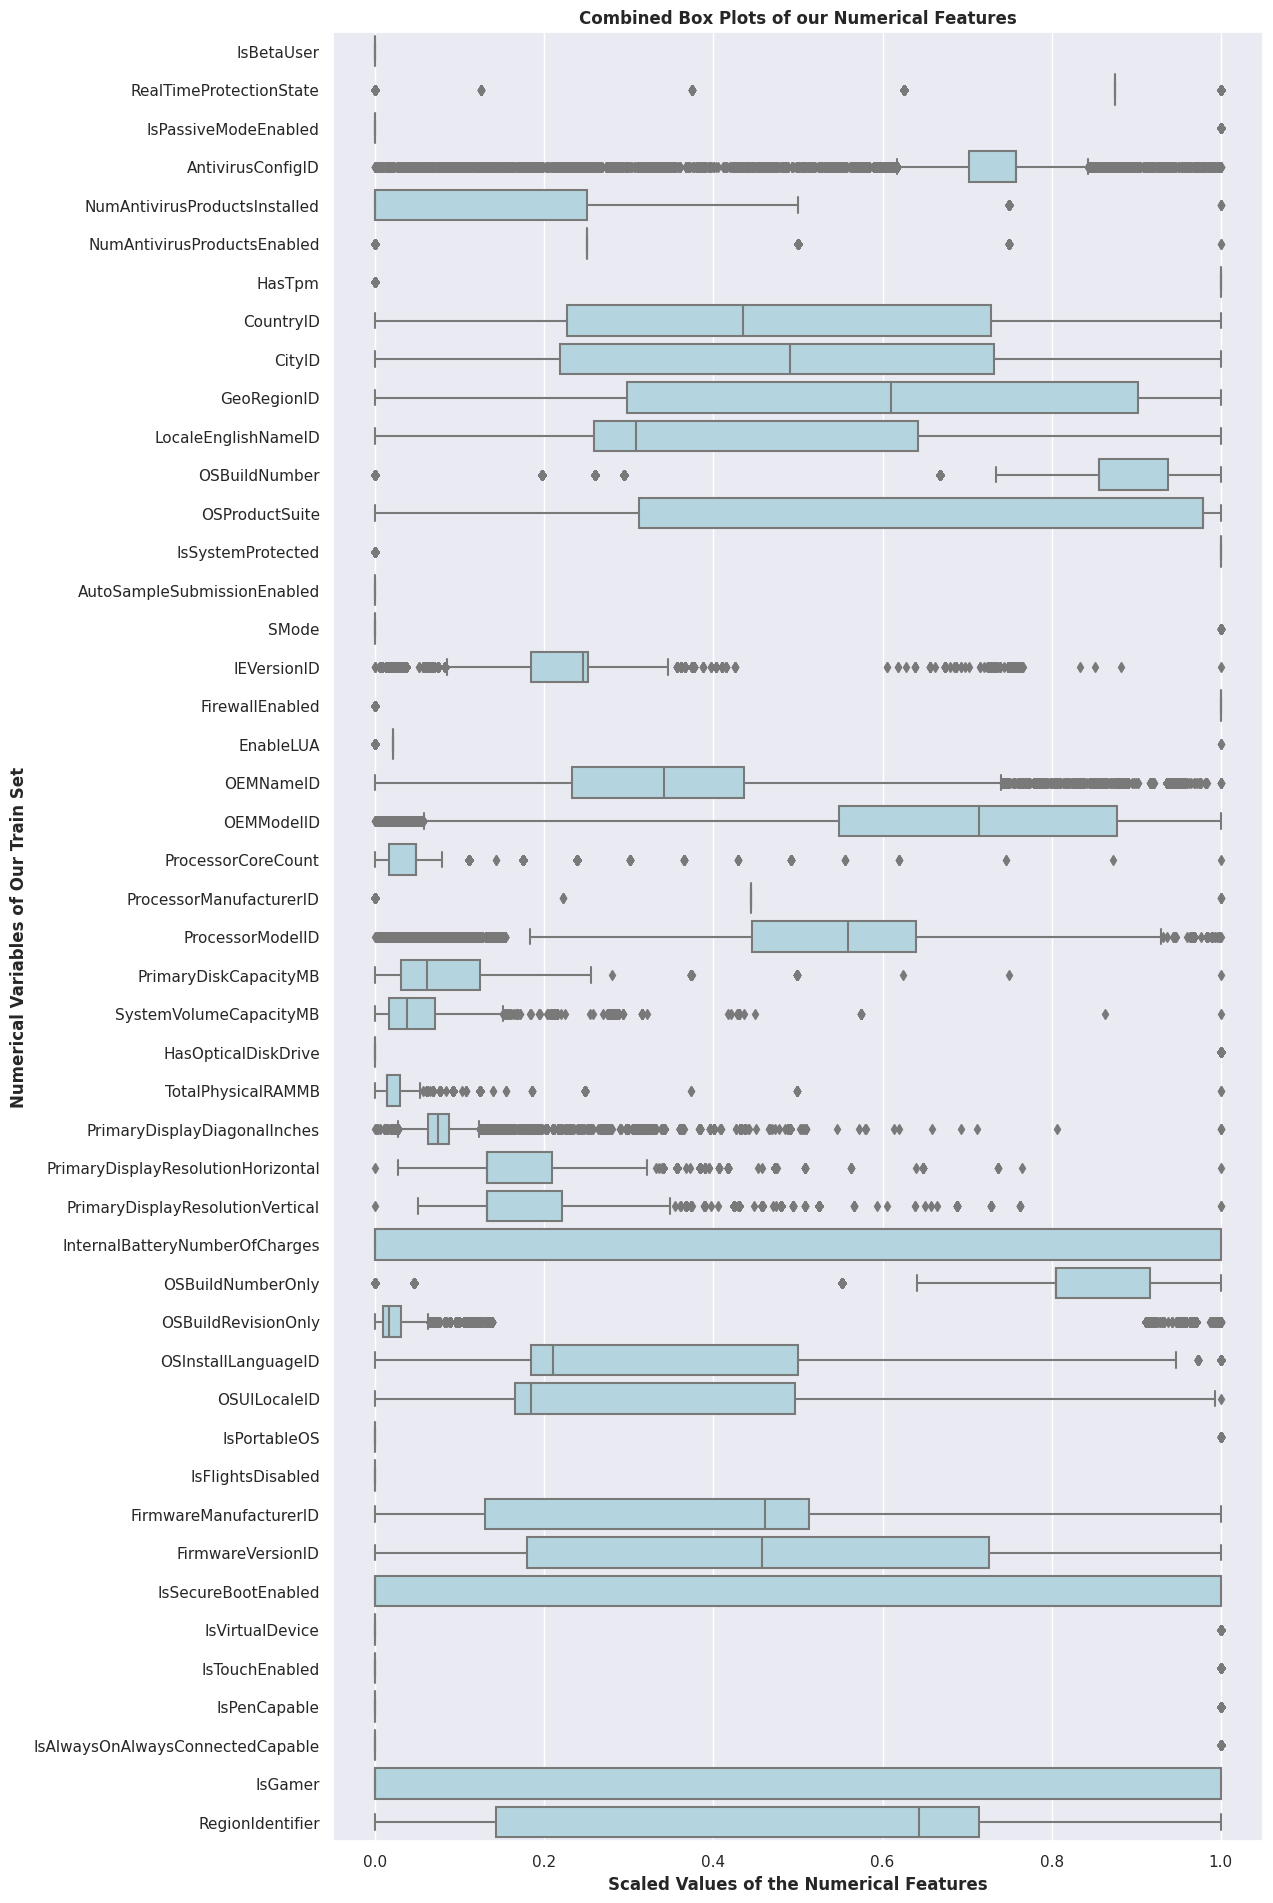

In [17]:

plt.figure(figsize=(12, len(numericalColumns) * 0.5))

sns.boxplot(data=MinMaxScaler().fit_transform(train[numericalColumns]), 
            color="lightblue", orient="h")

plt.title("Combined Box Plots of our Numerical Features", fontweight= "bold")
plt.xlabel("Scaled Values of the Numerical Features", fontweight="bold")
plt.ylabel("Numerical Variables of Our Train Set", fontweight="bold")

plt.yticks(ticks=range ( len(numericalColumns ) ), labels = numericalColumns)
plt.show()


### Histogram Plot for Numerical Columns

This will show the frequency vs values plots in the diagram 

we were not getting the increased accuracy in the log transoformed training dataset so we are ignoring it and we have comment it out

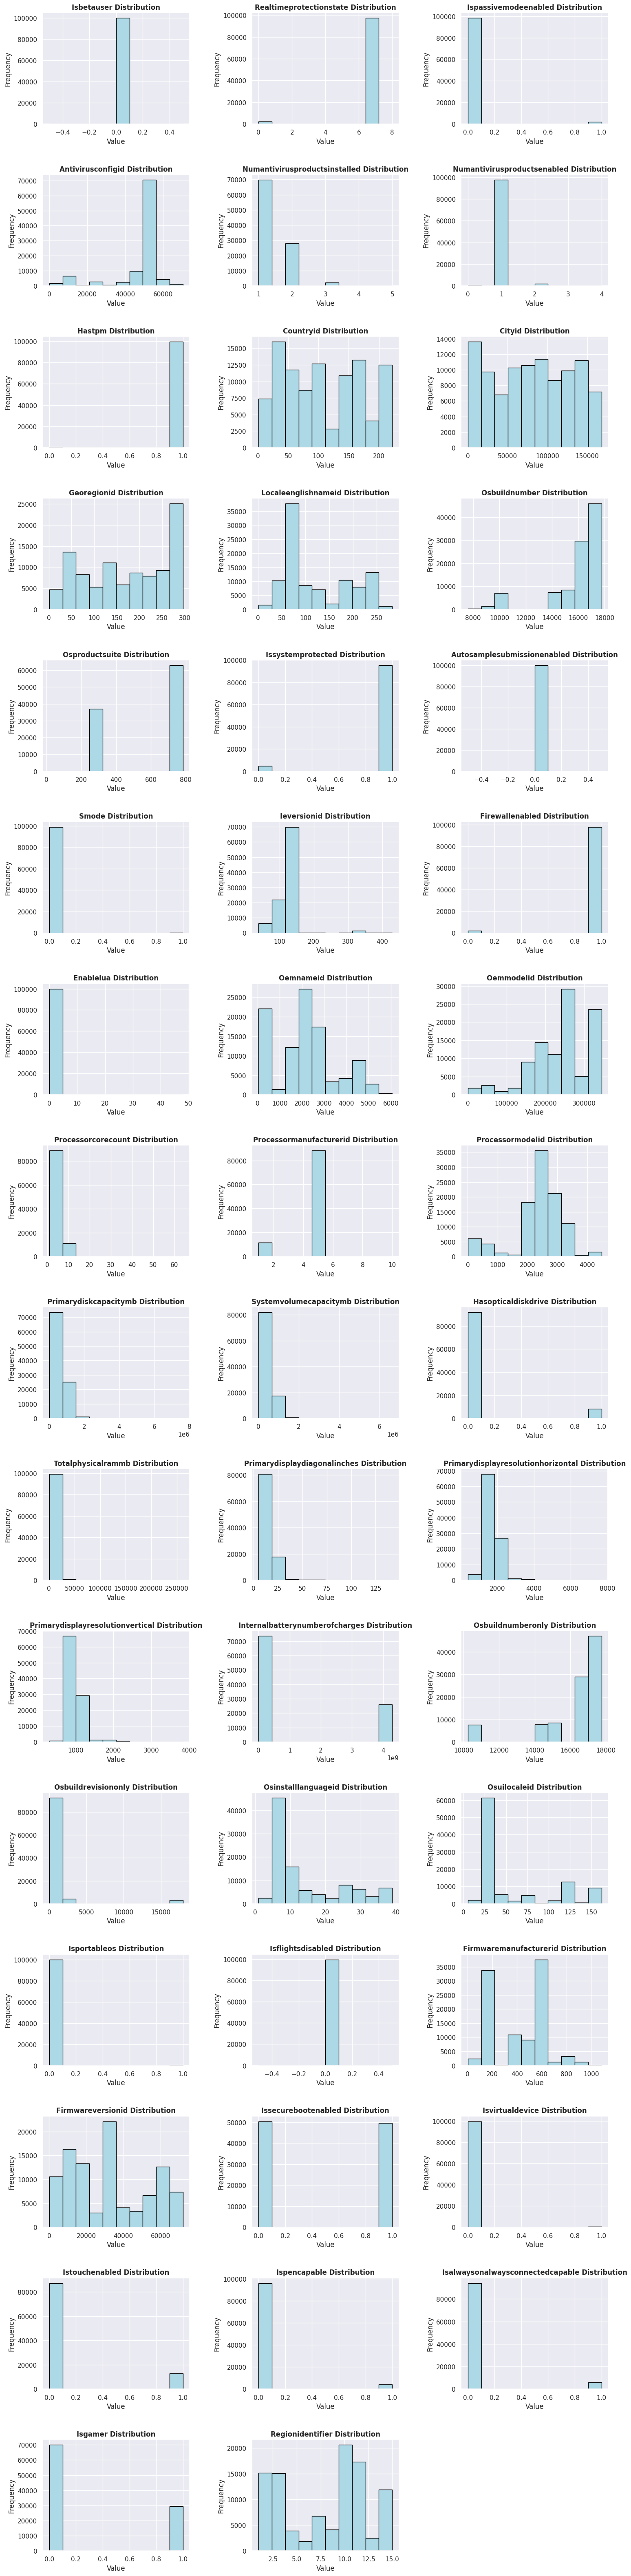

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)












Log-Transformed Data Distributions:


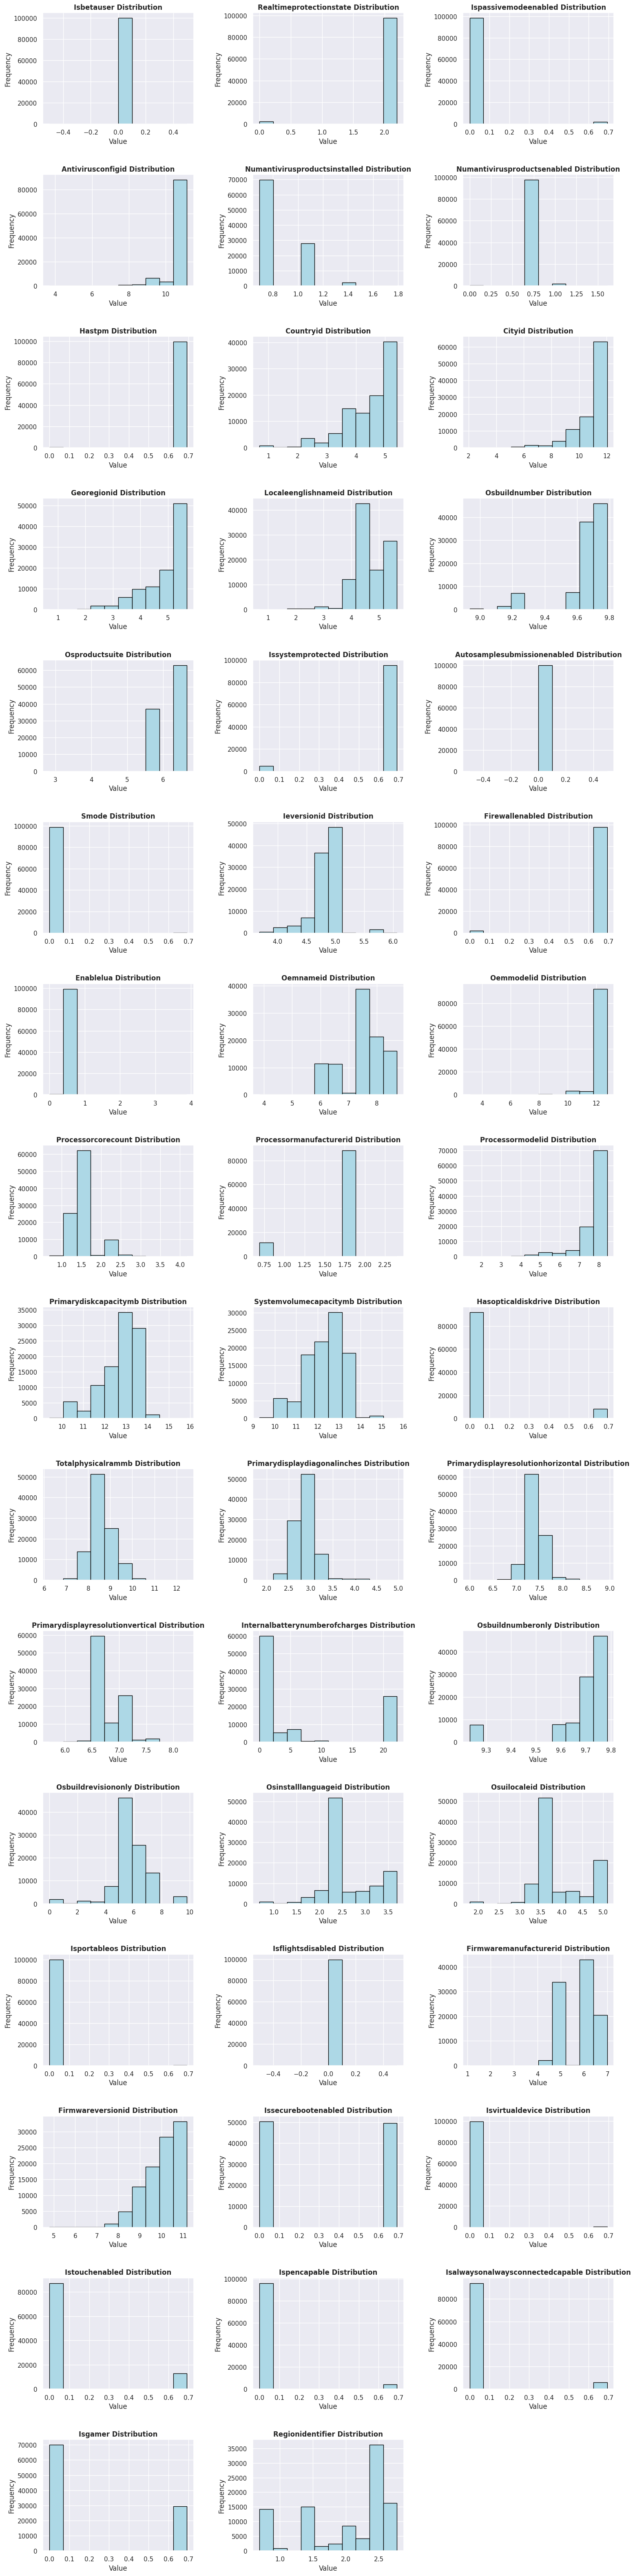

In [18]:

def plot_numerical_distributions(train, numericalColumns):
    num_cols = 3
    num_rows = (len(numericalColumns) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
    axes = axes.flatten()  
    for i, col in enumerate(numericalColumns):
        train[col].plot(kind="hist", ax=axes[i], color="lightblue", edgecolor="black")
        axes[i].set_title(f"{col.replace('_', ' ').title()} Distribution", fontweight="bold")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")
    for i in range(len(numericalColumns), len(axes)):
        fig.delaxes(axes[i])
    fig.tight_layout(pad=3.0)
    plt.show()


plot_numerical_distributions(train, numericalColumns)


train_log = train.copy()


for col in numericalColumns:
    train_log[col] = np.log1p(train_log[col])

print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print("Log-Transformed Data Distributions:")
plot_numerical_distributions(train_log, numericalColumns)


### Heatmap

- This shows the correlation of the columns with the other columns listed in the x and the y axis of the heat map
- if we encounter the same column name in the x and y axis it shows the cell as dark and value as 1
- Heat map is verry usefull to identify the multicolleanirity features from the data set.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


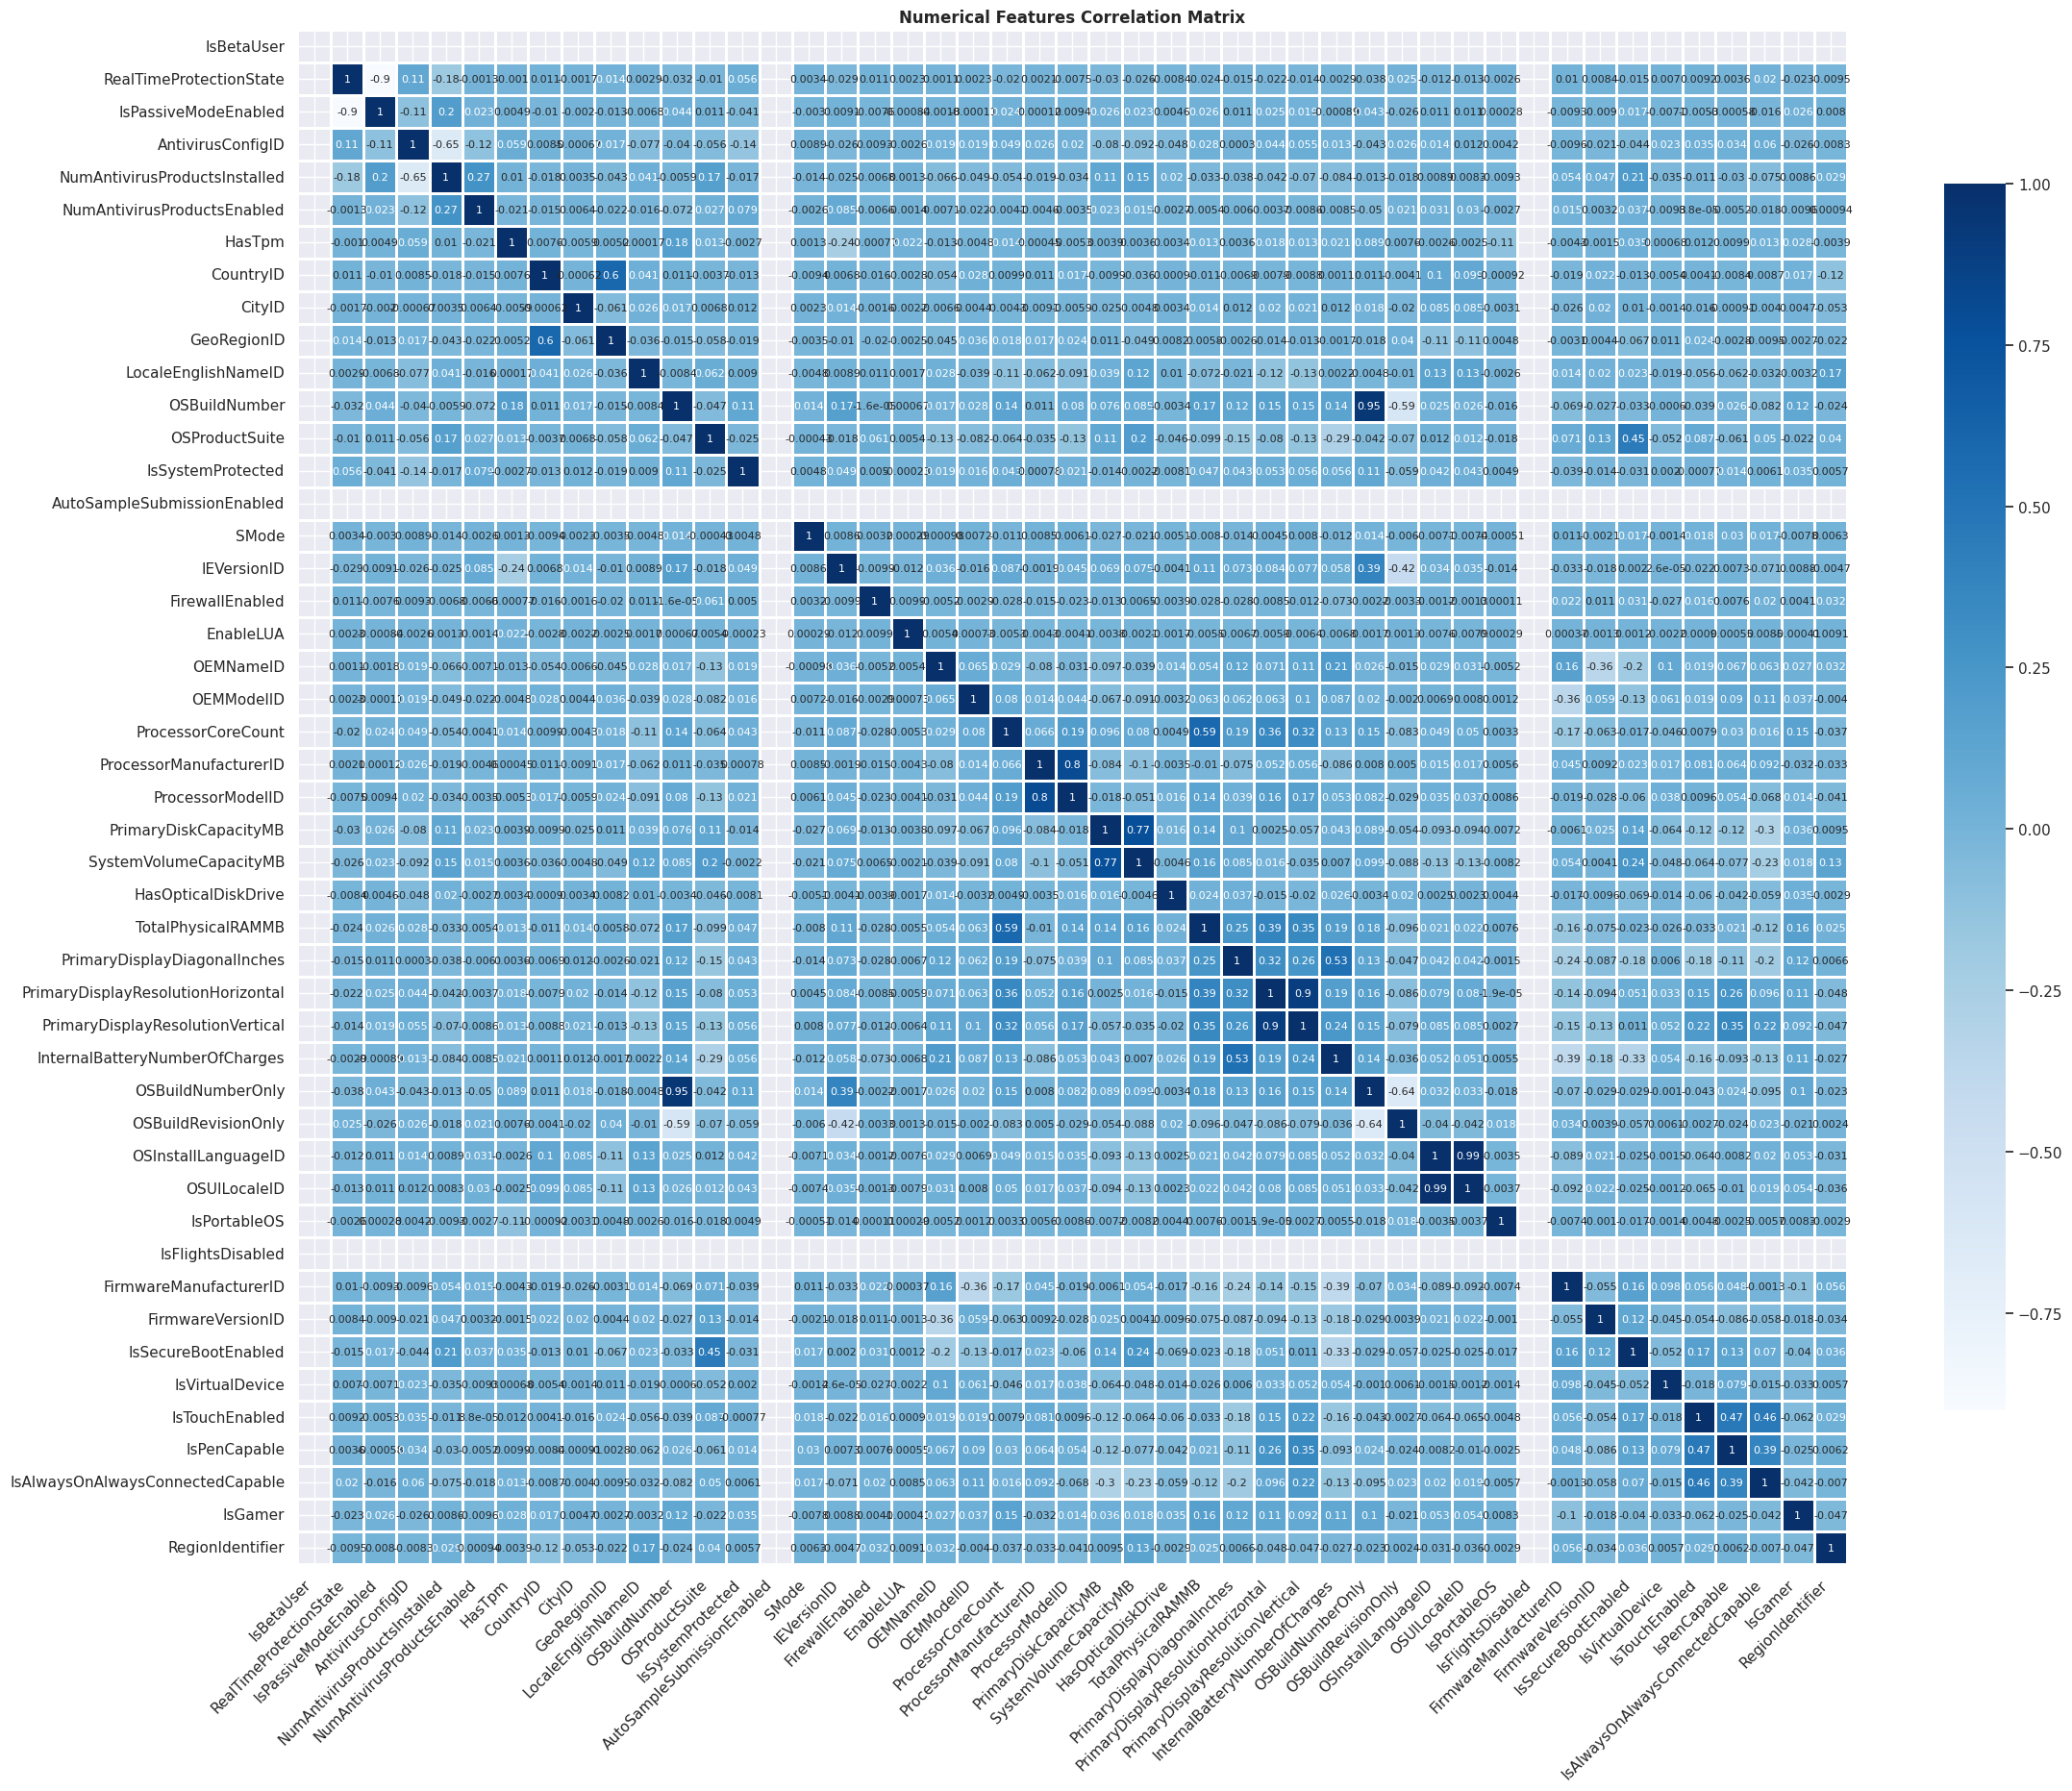

In [19]:

def plot_correlation_heatmap(train, num_cols):
    num_features = len(num_cols)
    fig_width = min(max(8, num_features * 0.5), 30)  
    fig_height = min(max(6, num_features * 0.4), 30) 

    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(train[num_cols].corr(), cmap="Blues", 
                annot=True, linecolor="white", linewidths=1,annot_kws={"size": 8},  
                cbar_kws={"shrink": 0.8}) 

    plt.title("Numerical Features Correlation Matrix", fontweight="bold")
    plt.xticks(rotation=45, ha="right")  
    plt.yticks(rotation=0)  
    plt.tight_layout()  
    plt.show()


plot_correlation_heatmap(train,numericalColumns )


### Correlation Chart of Numeric values with the Target




- Positive Correlation (close to +1): As one variable increases, the other tends to increase.
- Negative Correlation (close to -1): As one variable increases, the other tends to decrease.
- No Correlation (around 0): No linear relationship between the variables.

We have printed the data frame below also the min, max, negative correlation columns and zero correlation columns
- Minimum of the correlation df value -0.1513752971205135
- Maximum of the correlation df value 0.1183044964355608
- We have got 15 columns with negative correlation and 0 columns with no correlation.




- Beacouse we have got very less correlation on the both min and max sides, this suggests that numerical features may have only a limited linear influence on the target variable.
- But it is still ok to understand beacouse we are building a classification model which have the target values between 0 and 1 so we are getting such results.



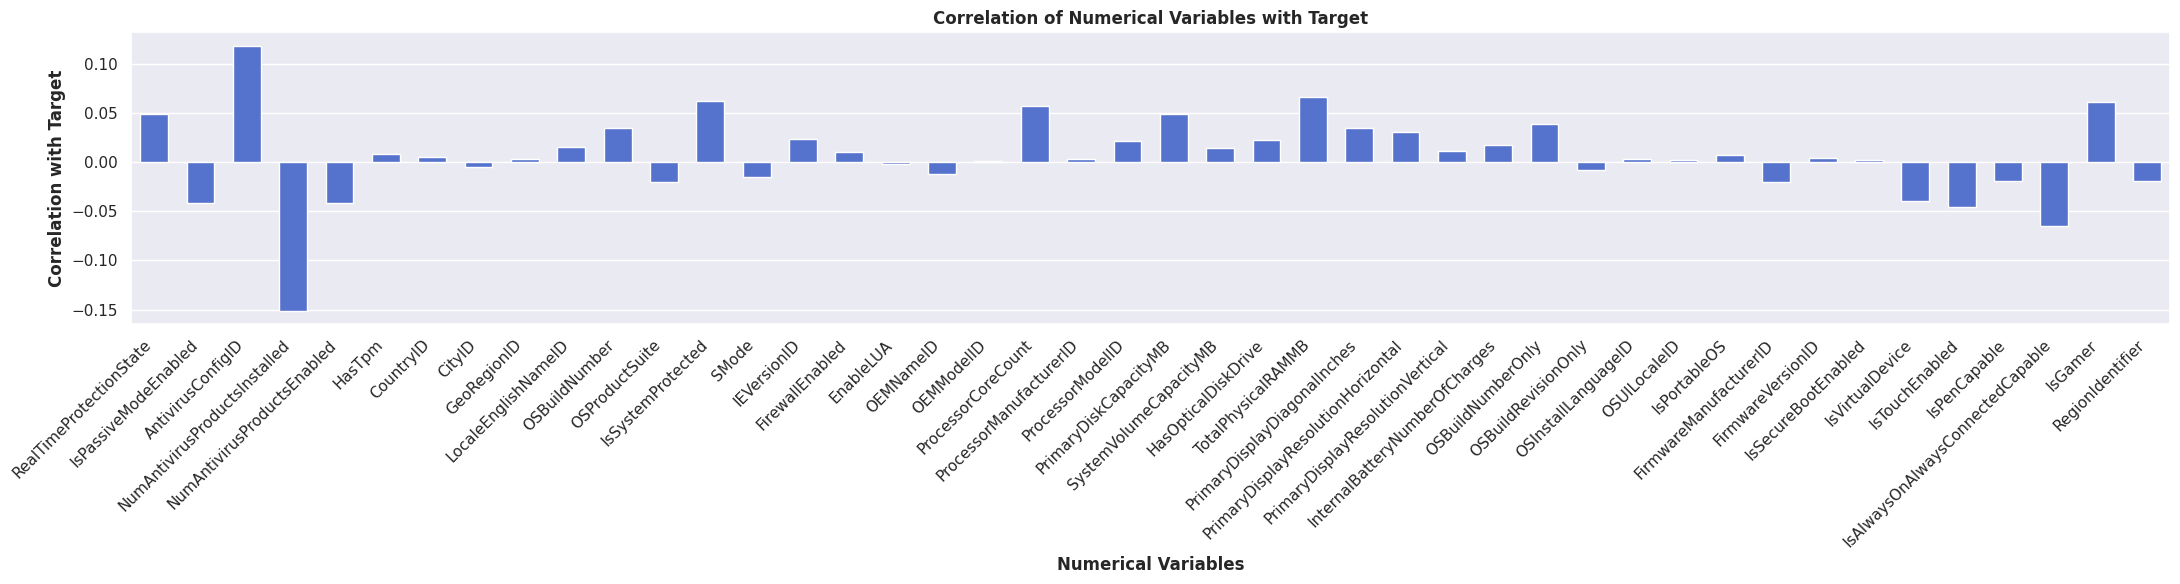









Printing the correlation Data frame
                              Variable  Correlation
0              RealTimeProtectionState    0.0490122
1                 IsPassiveModeEnabled   -0.0419966
2                    AntivirusConfigID    0.1183045
3        NumAntivirusProductsInstalled   -0.1513753
4          NumAntivirusProductsEnabled   -0.0415467
5                               HasTpm    0.0076577
6                            CountryID    0.0046164
7                               CityID   -0.0045965
8                          GeoRegionID    0.0028017
9                  LocaleEnglishNameID    0.0154872
10                       OSBuildNumber    0.0347118
11                      OSProductSuite   -0.0203130
12                   IsSystemProtected    0.0624010
13                               SMode   -0.0155589
14                         IEVersionID    0.0238199
15                     FirewallEnabled    0.0102665
16                           EnableLUA   -0.0019278
17                  

In [20]:
def plot_target_correlation(train, num_cols):

    num_cols = [col for col in num_cols if train[col].nunique() > 1]
    targets = train["target"].replace({"yes": 1, "no": 0})
    target_corr = [train[col].corr(targets) for col in num_cols]
    corr_df = pd.DataFrame({"Variable": num_cols, "Correlation": target_corr})
    corr_df = corr_df.dropna()
    plt.figure(figsize=(max(12, len(corr_df) * 0.5), 6))
    sns.barplot(x="Variable", y="Correlation", data=corr_df, color="royalblue", width=0.6)
    plt.title("Correlation of Numerical Variables with Target", fontweight="bold")
    plt.xlabel("Numerical Variables", fontweight="bold")
    plt.ylabel("Correlation with Target", fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()



    
    print('\n')
    print('\n')
    print('\n')
    print('\n')

    print("Printing the correlation Data frame")
    print(corr_df)


    print('\n')
    print('\n')
    print('\n')

    print('Minimum of the correlation df value', corr_df['Correlation'].min())
    print('Maximum of the correlation df value', corr_df['Correlation'].max())
    
    
    print('\n')
    print('\n')
    print('\n')
    print("Printing Negative correlation columns")
    print(corr_df[corr_df['Correlation']<0])
    
    
    
    print('\n')
    print('\n')
    print('\n')
    print("Printing zero correlation columns")
    print(corr_df[corr_df['Correlation']==0])



plot_target_correlation(train, numericalColumns)


<Figure size 2000x600 with 0 Axes>

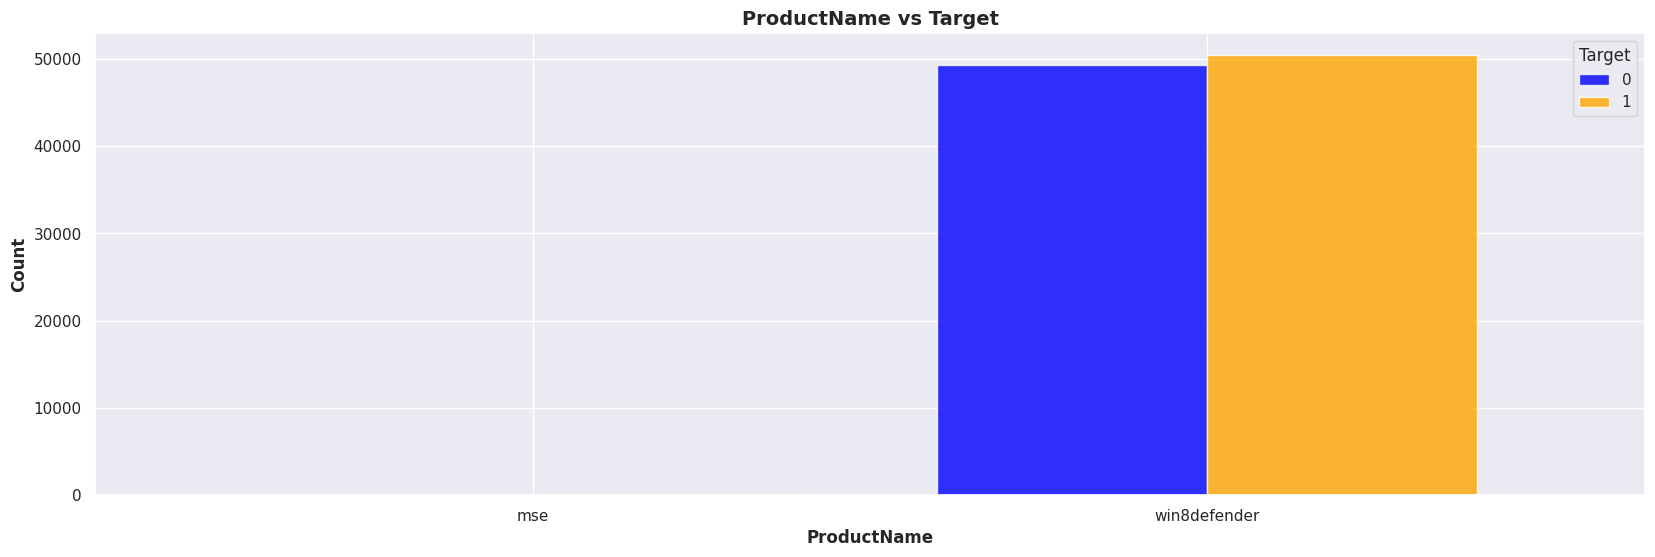

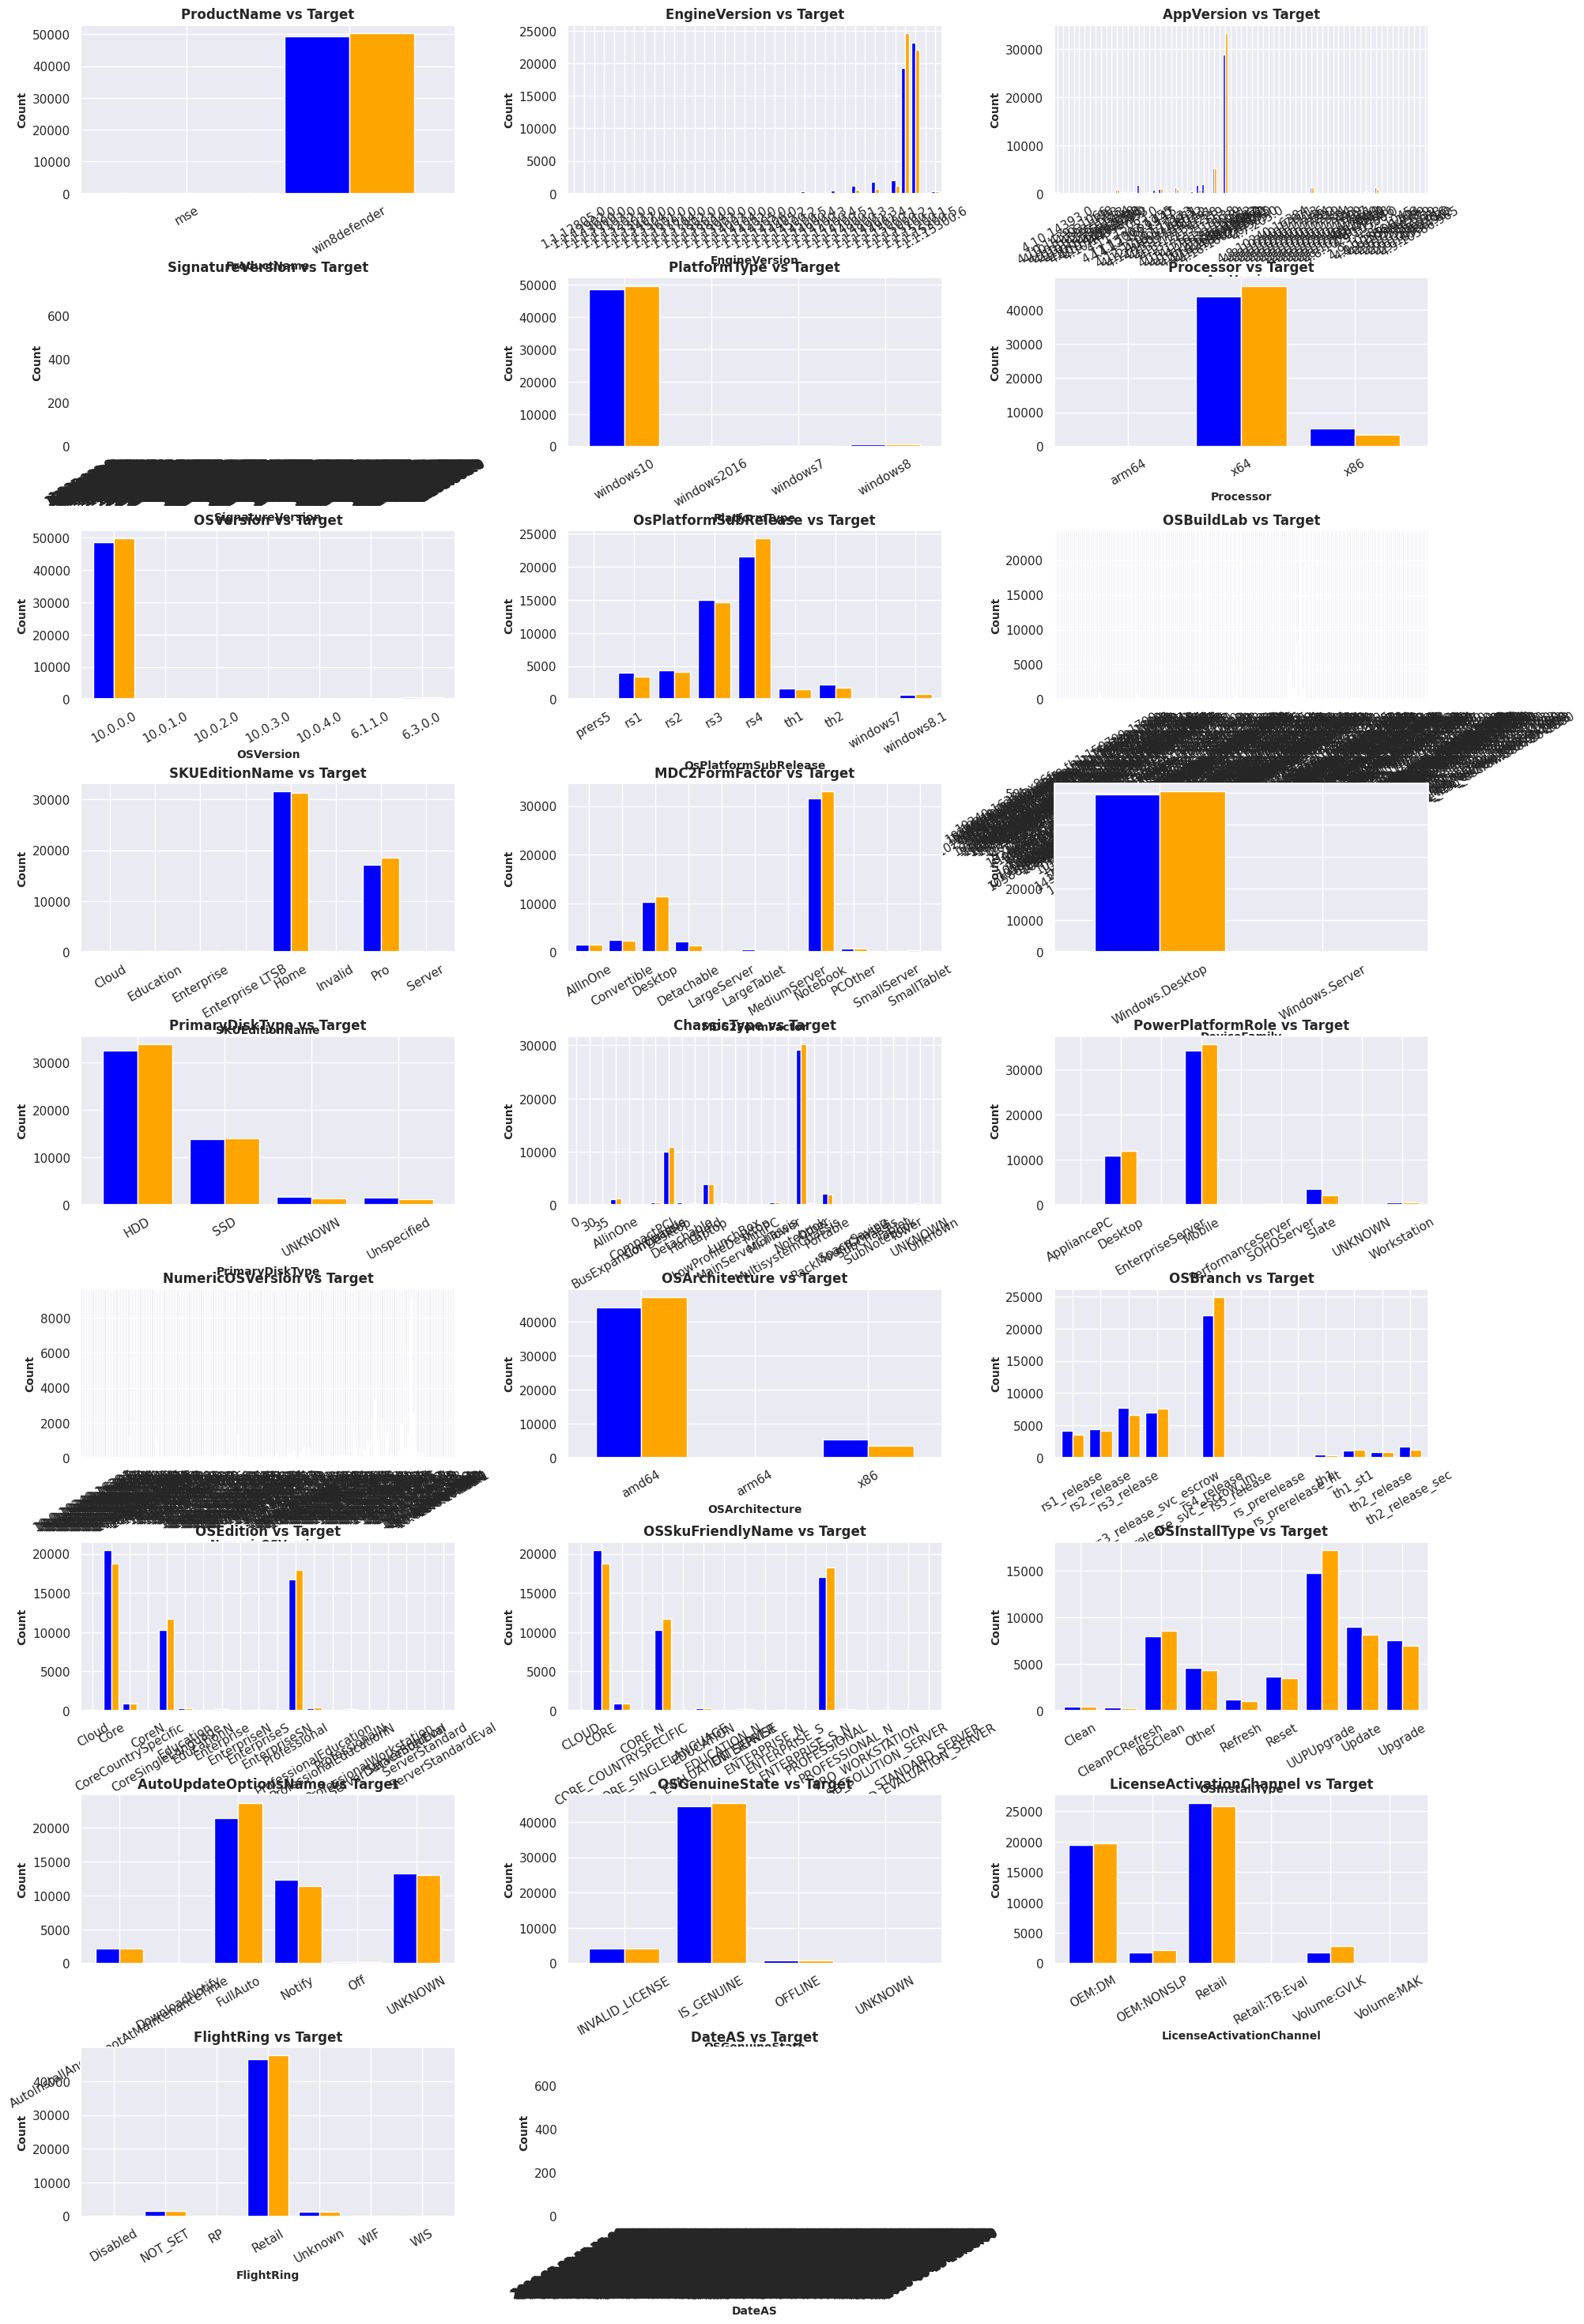

In [21]:
def plot_categorical_vs_target(train, cat_cols):
    plt.figure(figsize=(20, 6))
    pd.crosstab(train["ProductName"], train["target"]).plot(
        kind="bar", figsize=(20, 6), width=0.8, color=["blue", "orange"], alpha=0.8
    )
    plt.xticks(rotation=0)
    plt.title("ProductName vs Target", fontweight="bold", fontsize=14)
    plt.xlabel("ProductName", fontweight="bold", fontsize=12)
    plt.ylabel("Count", fontweight="bold", fontsize=12)
    plt.legend(title="Target")
    plt.show()
    num_plots = len(cat_cols[1:-1])
    cols = 3
    rows = -(-num_plots // cols)  

    fig, axes = plt.subplots(rows, cols, figsize=(22, rows * 4))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    for i, col in enumerate(categoricalColumns[1:-1]):
        pd.crosstab(train[col], train["target"]).plot(
            kind="bar", width=0.8, color=["blue", "orange"], ax=axes[i], legend=False
        )
        axes[i].set_title(f"{col} vs Target", fontweight="bold", fontsize=12)
        axes[i].set_xlabel(col, fontweight="bold", fontsize=10)
        axes[i].set_ylabel("Count", fontweight="bold", fontsize=10)
        axes[i].tick_params(axis="x", labelrotation=30)
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.show()

plot_categorical_vs_target(train, categoricalColumns)

### Insights





   - `DateAS` and `PlatformType` show the very good association with the target variable, this means they have the more predictive power compare to other features.
   - `SignatureVersion`, `AppVersion`, and `EngineVersion` also have significant associations, this indicates that system update versions play a critical importent role in determining threats.  
   - Features like `OSArchitecture`, `NumericOSVersion`, `PowerPlatformRole`, and `OSBuildLab` have a noticeable association but are not as strong as the top association variables.
   - Some variables, such as `ProductName`, `FlightRing`, and `OSGenuineState`, show very little association with the target.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


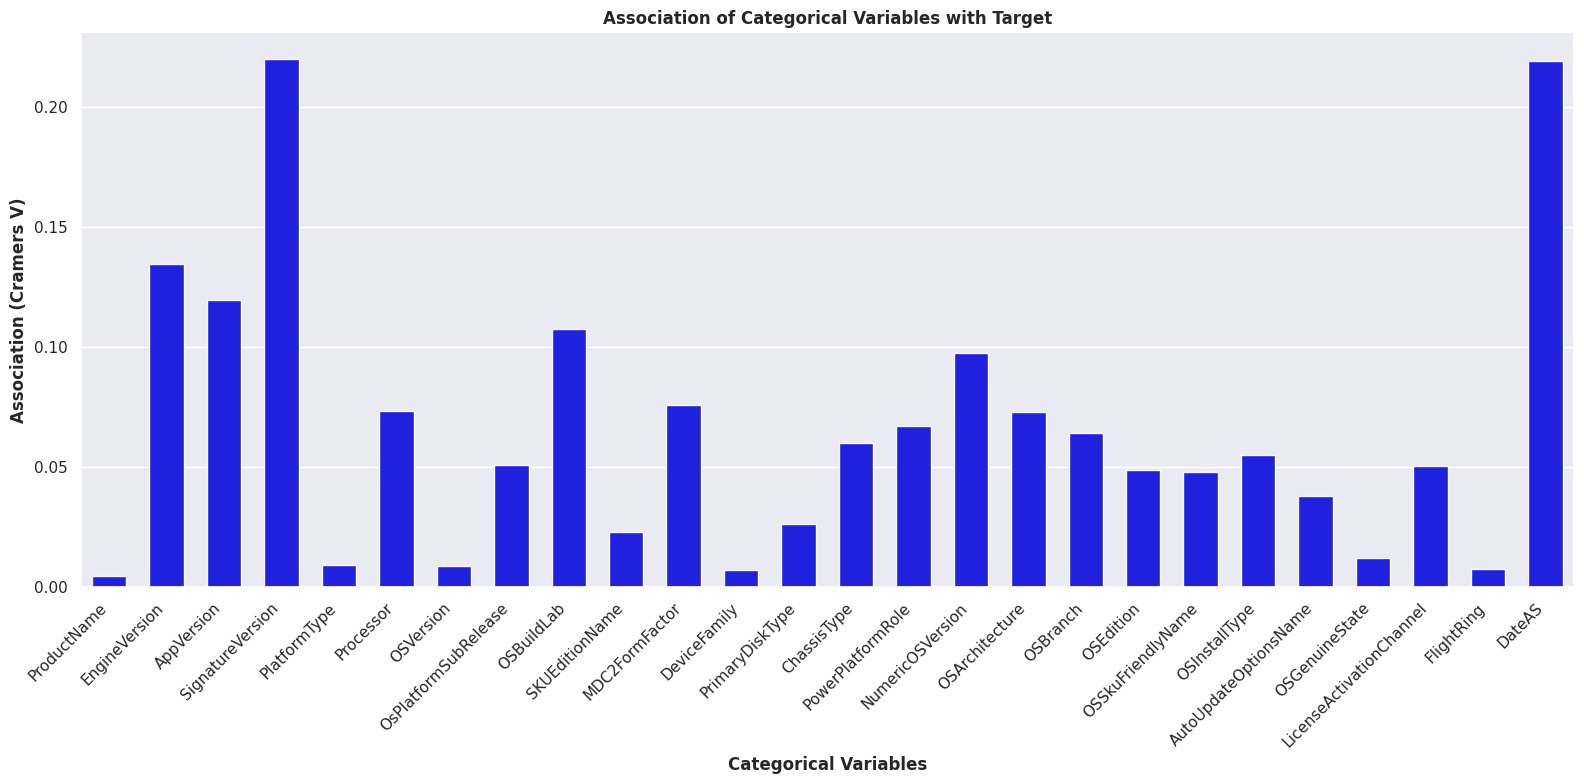

In [22]:

def calculate_cramer_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))



associations = [calculate_cramer_v(train[col], train["target"]) for col in categoricalColumns[1:-1]]

plt.figure(figsize=(max(16, len(categoricalColumns) * 0.5), 8))  

sns.barplot(x=categoricalColumns[1:-1], y=associations, color="blue", width=0.6)

plt.title("Association of Categorical Variables with Target", fontweight="bold")
plt.xlabel("Categorical Variables", fontweight="bold")
plt.ylabel("Association (Cramers V)", fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [23]:
target_counts = train["target"].value_counts()
print(target_counts)

# now we can calculate the imbalance ratio
difference = (target_counts.iloc[0] - target_counts.iloc[1])
imbalanceRatio =  difference / target_counts.iloc[0]
print("Imbalance Ratio:", imbalanceRatio)


target
1    50525
0    49475
Name: count, dtype: int64
Imbalance Ratio: 0.02078179119247897


### Data Preprocession Step

Here in this step we are identifying null values and we will treat them with the mode values.

- Mode values represent the most frequent values
- we are printing
    - the null value
    - total null values cell
    - percentage of null values

In [24]:
train.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [25]:
print("Total this much cells are empty",train.isnull().sum().sum())
print("This much percentage of the cells are empty",train.isnull().sum().sum()  / (len(train.columns) * len(train)) *100)

Total this much cells are empty 6533
This much percentage of the cells are empty 0.08596052631578947


## Data Preprocessing

Dropping the DateAS and DateOS columns and conversion / splittting of the engineversion, appversion, etc columns.

In [26]:


train = train_set.drop('target',axis=1)


# train['DateAS'] = pd.to_datetime(train['DateAS'])
# train['DateOS'] = pd.to_datetime(train['DateOS'])
# train['Days_Diff'] = (train['DateOS'] - train['DateAS']).dt.days
train.drop(columns=['DateAS', 'DateOS', 'MachineID'], inplace=True)
# we were not able to increase the accuracy with the DateAS and DateOS column so we are droping theme

# test['DateAS'] = pd.to_datetime(test['DateAS'])
# test['DateOS'] = pd.to_datetime(test['DateOS'])
# test['Days_Diff'] = (test['DateOS'] - test['DateAS']).dt.days
test.drop(columns=['DateAS', 'DateOS', 'MachineID'], inplace=True)
# we were not able to increase the accuracy with the DateAS and DateOS column so we are droping theme


# we have got this data in the dot format so we are splitting the data

# processing in training data
train[['ev1', 'ev2', 'ev3', 'ev4']] = train["EngineVersion"].str.split('.', expand=True).astype(float)
train[['osv1', 'osv2', 'osv3', 'osv4']] = train["OSVersion"].str.split('.', expand=True).astype(float)
train[['sv1', 'sv2', 'sv3', 'sv4']] = train["SignatureVersion"].str.split('.', expand=True).astype(float)
train[['nosv1', 'nosv2', 'nosv3', 'nosv4']] = train["NumericOSVersion"].str.split('.', expand=True).astype(float)
train[['av1', 'av2', 'av3', 'av4']] = train["AppVersion"].str.split('.', expand=True).astype(float)

train.drop(columns=["EngineVersion","AppVersion","SignatureVersion","OSVersion","NumericOSVersion"], inplace=True)

# processing in test data
test[['ev1', 'ev2', 'ev3', 'ev4']] = test["EngineVersion"].str.split('.', expand=True).astype(float)
test[['osv1', 'osv2', 'osv3', 'osv4']] = test["OSVersion"].str.split('.', expand=True).astype(float)
test[['sv1', 'sv2', 'sv3', 'sv4']] = test["SignatureVersion"].str.split('.', expand=True).astype(float)
test[['nosv1', 'nosv2', 'nosv3', 'nosv4']] = test["NumericOSVersion"].str.split('.', expand=True).astype(float)
test[['av1', 'av2', 'av3', 'av4']] = test["AppVersion"].str.split('.', expand=True).astype(float)

test.drop(columns=["EngineVersion","AppVersion","SignatureVersion","OSVersion","NumericOSVersion"], inplace=True)




#### Dropping columns of less usage

- we are dropping this columns beacouse we tested them and it was ok to drop them
- beacouse they were not contributing to increase the accuracy of our ML model


In [27]:


droppingColumnsList = ["ProductName","IsBetaUser","IsPassiveModeEnabled","HasTpm","OSBuildLab","IsSystemProtected","AutoSampleSubmissionEnabled","SMode","FirewallEnabled","EnableLUA","DeviceFamily","IsPortableOS","IsFlightsDisabled","IsVirtualDevice","IsAlwaysOnAlwaysConnectedCapable","IsPenCapable","ev1","ev2","av1","sv1","sv4","osv4","nosv1","nosv2"]

train.drop(columns=droppingColumnsList, inplace=True , axis = 1)

test.drop(columns=droppingColumnsList, inplace=True)



### Handling Missing Values

We are replacing the missing value with Most_frequent values



In [28]:

si = SimpleImputer(strategy='most_frequent')

train = pd.DataFrame(si.fit_transform(train), columns=train.columns)

test = pd.DataFrame(si.transform(test), columns=test.columns)


### Defining Encoding for Categorical Columns

In [29]:

numericalColumns = train.select_dtypes(exclude=["object"]).columns.tolist()
categoricalColumns = train.select_dtypes(include=["object"]).columns.tolist()


encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train[categoricalColumns] = encoder.fit_transform(train[categoricalColumns])
test[categoricalColumns] = encoder.transform(test[categoricalColumns])


### Train Test Split of the Training Data set

- We are doing the split with the random state as 7.
- We will use the X_val and y_val data for data validation purposes and to print the accuacy metrices and results.
- We are making 70% dat of train set and rest 30% of the data for validation purposes


In [30]:


X = train
y = train_set['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)




### Defining Data Preprocessing Pipelines

- The data Preprocessing step is very important and should be performed on the all training, validation and testing set.

- The Reults may get affected if proper pipeline define and data preprocessiong is not done

- We were not getting the increased accuracy in the log transoformed training dataset so we are ignoring it and we have comment it out

In [31]:



# log_transformer = FunctionTransformer(np.log1p, validate=False)

num_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    # ('log_transform', log_transformer),
    # ('scaler', RobustScaler())#----> we got best score of 0.62530 thats why we have comment out it
    ('scaler', StandardScaler())#----> we got best score of 0.62570 with lightgbm
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, X.select_dtypes(exclude=['object']).columns),
    ('cat', cat_transformer, categoricalColumns)
])

# pca = PCA(n_components=60)#---> we are not using the PCA beacouse it was not able to increase the accuracy

### Defining Models Pipelines

We are making the Logistic Regression model, Random Forest Model, LightGBM Model, MLP Classifier and Decision Tree

We have comment out the Naive Bayes beacouse it cannot take input in negative number also does not give good accuracy when we were testing it.

In [32]:


models = {
    'Logistic Regression': (LogisticRegression(), {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__max_iter': [100, 200, 300]
    }),
    
    # 'Naive Bayes': (MultinomialNB(), {
    #     'classifier__alpha': [0.1, 0.5, 1.0, 2.0, 5.0] 
    # # }),
     'Decision Tree': (DecisionTreeClassifier(), {
        'classifier__max_depth': [5, 10, 20]
        }),
    'Random Forest': (RandomForestClassifier(random_state=7), {
        'classifier__n_estimators': [100, 150],
        'classifier__max_depth': [30, 50],
        'classifier__min_samples_split': [30, 50],
        'classifier__min_samples_leaf': [2],
        'classifier__max_features': ['sqrt', 'log2']
    }),
    'LightGBM': (LGBMClassifier(), {
        'classifier__n_estimators': [100, 300, 500],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [-1, 5, 10]
    }),
    
    'MLPClassifier': (MLPClassifier(max_iter=10), {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__alpha': uniform(0.0001, 0.01),
        'classifier__learning_rate_init': uniform(0.001, 0.1)
    })

}


### Defining Preprocessiog Pipelines and Fitting The Data













Currently Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Best Model Accuracy: 62.00%
Test F1 Score (Weighted): 0.62

Confusion Matrix:
[[5609 4286]
 [3313 6792]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60      9895
           1       0.61      0.67      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000


Best Parameters:
{'classifier__max_iter': 200, 'classifier__C': 0.01}


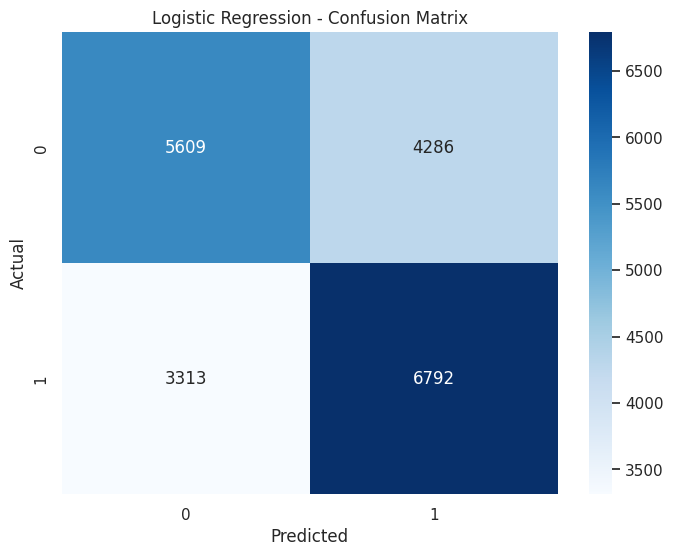


Hyperparameter Search Results for Logistic Regression:
                                              params  mean_test_score  \
0  {'classifier__max_iter': 200, 'classifier__C':...        0.6235000   
1  {'classifier__max_iter': 300, 'classifier__C':...        0.6234500   
2  {'classifier__max_iter': 100, 'classifier__C':...        0.6234375   
3  {'classifier__max_iter': 300, 'classifier__C':...        0.6166749   
4  {'classifier__max_iter': 300, 'classifier__C': 1}        0.5922875   
5  {'classifier__max_iter': 200, 'classifier__C': 1}        0.5905875   
6  {'classifier__max_iter': 100, 'classifier__C':...        0.5880875   
7  {'classifier__max_iter': 200, 'classifier__C':...        0.5757500   
8  {'classifier__max_iter': 200, 'classifier__C':...        0.5748250   
9  {'classifier__max_iter': 300, 'classifier__C':...        0.5712500   

   mean_train_score  
0         0.6467562  
1         0.6467187  
2         0.6466750  
3         0.7152875  
4         0.8321750  
5       

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Decision Tree Best Model Accuracy: 60.24%
Test F1 Score (Weighted): 0.60

Confusion Matrix:
[[5465 4430]
 [3522 6583]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      9895
           1       0.60      0.65      0.62     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000


Best Parameters:
{'classifier__max_depth': 10}


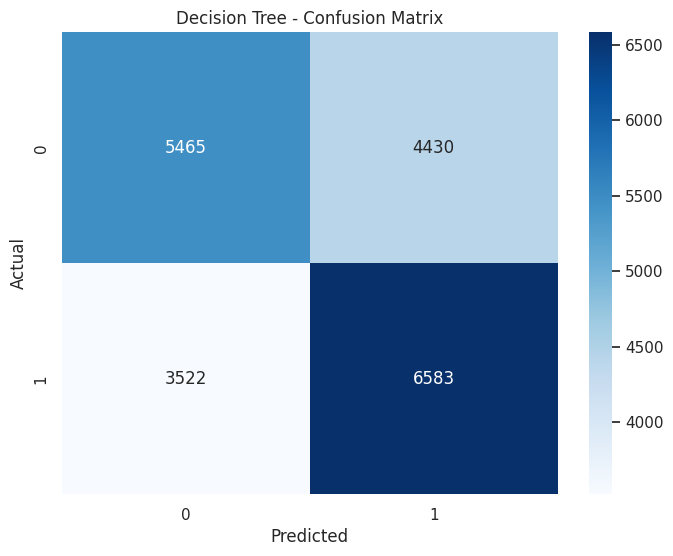


Hyperparameter Search Results for Decision Tree:
                          params  mean_test_score  mean_train_score
0  {'classifier__max_depth': 10}        0.6021375         0.6431813
1   {'classifier__max_depth': 5}        0.5998376         0.6049875
2  {'classifier__max_depth': 20}        0.5776125         0.8117124










Currently Training Random Forest...

Random Forest Best Model Accuracy: 61.94%
Test F1 Score (Weighted): 0.62

Confusion Matrix:
[[5511 4384]
 [3227 6878]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      9895
           1       0.61      0.68      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000


Best Parameters:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 30, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', '

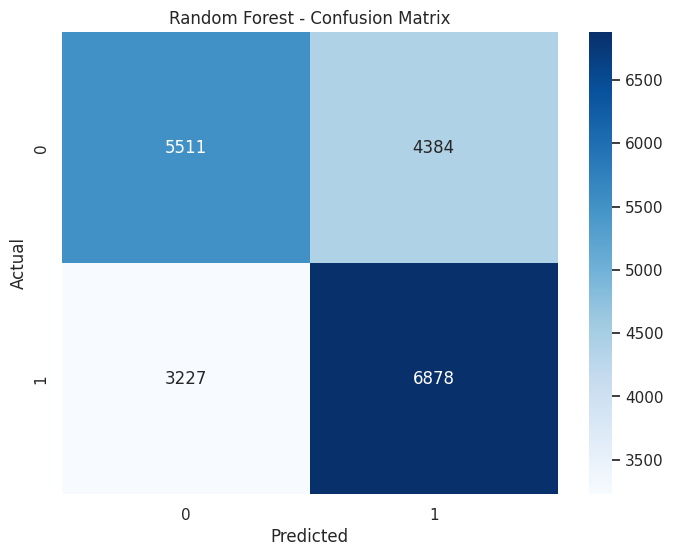


Hyperparameter Search Results for Random Forest:
                                              params  mean_test_score  \
0  {'classifier__n_estimators': 100, 'classifier_...        0.6166375   
1  {'classifier__n_estimators': 100, 'classifier_...        0.6166125   
2  {'classifier__n_estimators': 150, 'classifier_...        0.6148000   
3  {'classifier__n_estimators': 100, 'classifier_...        0.6139750   
4  {'classifier__n_estimators': 100, 'classifier_...        0.6138000   
5  {'classifier__n_estimators': 100, 'classifier_...        0.5844125   
6  {'classifier__n_estimators': 100, 'classifier_...        0.5840375   
7  {'classifier__n_estimators': 150, 'classifier_...        0.5793875   
8  {'classifier__n_estimators': 150, 'classifier_...        0.5716750   
9  {'classifier__n_estimators': 150, 'classifier_...        0.5714000   

   mean_train_score  
0         0.7016500  
1         0.6964188  
2         0.6676500  
3         0.6645625  
4         0.6671875  
5         0.60

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.281478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14740
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 5248
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001

LightGBM Best Model Accuracy: 62.52%
Test F1 Score (Weighted): 0.62

Confusion Matrix:
[[5793 4102]
 [3393 6712]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.62      0.62     20000
weighted avg       0.63      0

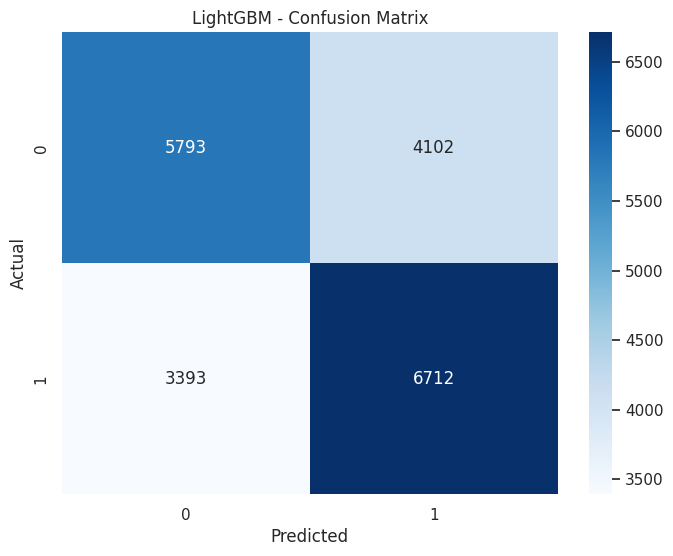


Hyperparameter Search Results for LightGBM:
                                              params  mean_test_score  \
0  {'classifier__n_estimators': 100, 'classifier_...        0.6268500   
1  {'classifier__n_estimators': 500, 'classifier_...        0.6259875   
2  {'classifier__n_estimators': 100, 'classifier_...        0.6259375   
3  {'classifier__n_estimators': 300, 'classifier_...        0.6259375   
4  {'classifier__n_estimators': 300, 'classifier_...        0.6251250   
5  {'classifier__n_estimators': 500, 'classifier_...        0.6243875   
6  {'classifier__n_estimators': 500, 'classifier_...        0.6234625   
7  {'classifier__n_estimators': 300, 'classifier_...        0.6230875   
8  {'classifier__n_estimators': 500, 'classifier_...        0.6223625   
9  {'classifier__n_estimators': 500, 'classifier_...        0.6220500   

   mean_train_score  
0         0.6735375  
1         0.6525125  
2         0.6522750  
3         0.6864187  
4         0.6598125  
5         0.7128812

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



MLPClassifier Best Model Accuracy: 61.92%
Test F1 Score (Weighted): 0.62

Confusion Matrix:
[[5884 4011]
 [3605 6500]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      9895
           1       0.62      0.64      0.63     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000


Best Parameters:
{'classifier__alpha': 0.008007635115767148, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate_init': 0.014316944575925018}


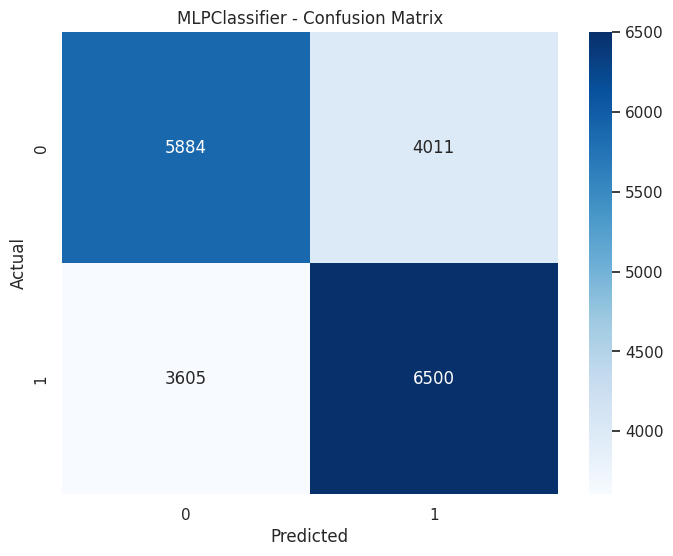


Hyperparameter Search Results for MLPClassifier:
                                              params  mean_test_score  \
0  {'classifier__alpha': 0.008007635115767148, 'c...        0.6178375   
1  {'classifier__alpha': 0.009882228970785825, 'c...        0.6132000   
2  {'classifier__alpha': 0.0027258377004339704, '...        0.6125875   
3  {'classifier__alpha': 0.009601295004136456, 'c...        0.6121750   
4  {'classifier__alpha': 0.008137390361043753, 'c...        0.6064250   
5  {'classifier__alpha': 0.002233853535799155, 'c...        0.5883001   
6  {'classifier__alpha': 0.0008630828937395718, '...        0.5867375   
7  {'classifier__alpha': 0.0027843898010187114, '...        0.5762118   
8  {'classifier__alpha': 0.0027387083903789864, '...        0.5752249   
9  {'classifier__alpha': 0.006843304229389548, 'c...        0.5308747   

   mean_train_score  
0         0.6533437  
1         0.6257312  
2         0.6321063  
3         0.6432250  
4         0.6203500  
5         0.60

In [33]:

preprocessor.fit(X_train)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    # ('pca', pca),
    ('classifier', models)])





best_model_name = None
best_accuracy = 0
best_model = None


for name, (model, param_grid) in models.items():
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print(f"Currently Training {name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)  # Use the model directly here
    ])

    search = RandomizedSearchCV(
        pipeline, 
        param_grid, 
        cv=3, 
        scoring='accuracy',
        n_jobs=-1, 
        n_iter=10, 
        random_state=7, 
        return_train_score=True
    )


    search.fit(X_train, y_train)
    y_pred = search.best_estimator_.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')

    print(f"\n{name} Best Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Test F1 Score (Weighted): {f1:.2f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    print("\nBest Parameters:")
    print(search.best_params_)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = search.best_estimator_
        
    results_df = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'mean_train_score']]
    results_df = results_df.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)
    print(f"\nHyperparameter Search Results for {name}:")
    print(results_df)



### Saving The submission.csv

- We finally predicted our results on the test.csv and we have saved the file in `/kaggle/working/` folder

In [34]:


test = test[X_train.columns]


test_final = best_model.named_steps['preprocessor'].transform(test)
test_predictions = best_model.named_steps['classifier'].predict(test_final)


submission = pd.DataFrame({'id': np.arange(0, len(test_predictions)), 'target': test_predictions})
submission_file = '/kaggle/working/submission.csv'
submission.to_csv(submission_file, index=False)

print('\n')
print(f"Submission saved to {submission_file}")
print('\n')
print(f"Best Model: {best_model_name} with accuracy {best_accuracy * 100:.2f}%")


print('\n')
print('\n')
print ("The shape of predicted result",submission.shape)

print('\n')
print ("The Head of the predicted results",submission.head())



Submission saved to /kaggle/working/submission.csv


Best Model: LightGBM with accuracy 62.52%




The shape of predicted result (10000, 2)


The Head of the predicted results    id  target
0   0       1
1   1       0
2   2       1
3   3       0
4   4       0
